## 2.3 Data Load

In [45]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [46]:
fetch_housing_data()

In [47]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [48]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [49]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [50]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [51]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


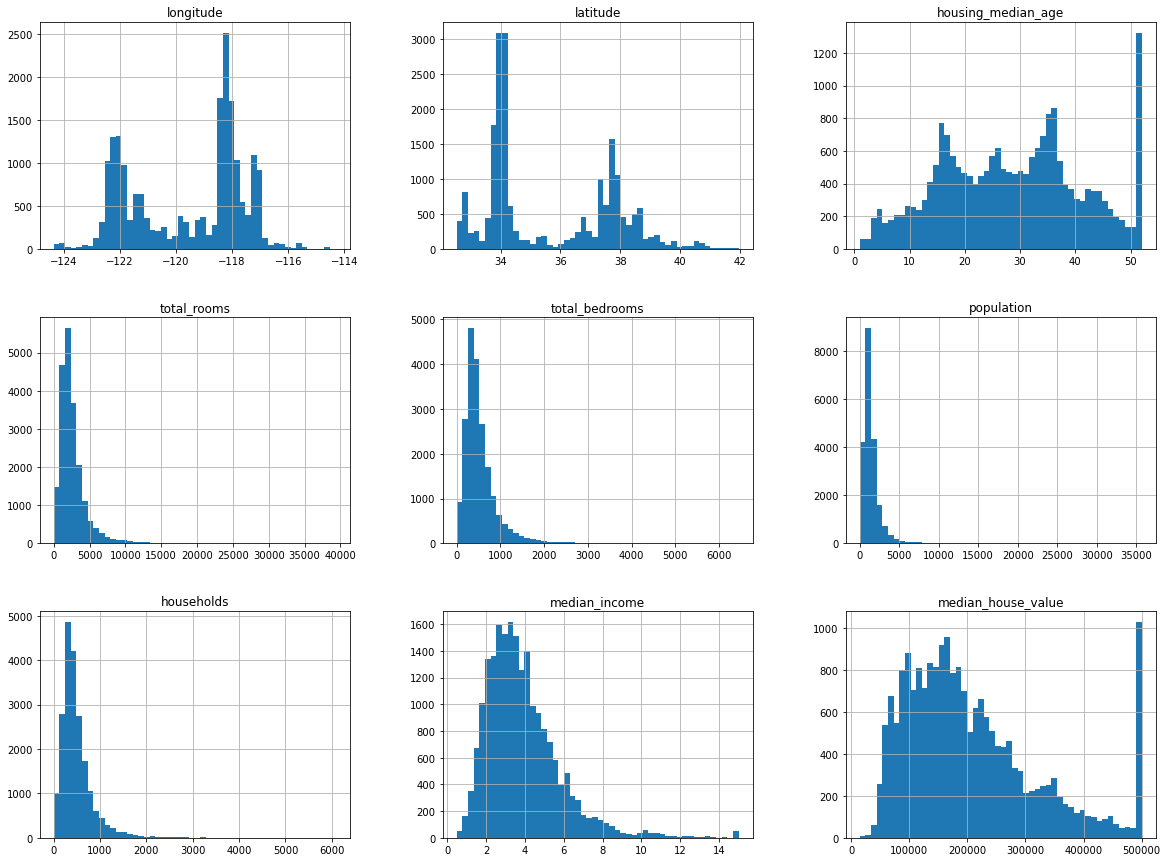

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [53]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [54]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [55]:
print('split train test\n','step 1:', np.random.permutation(len(housing)))
test_set_size = int(len(housing) * 0.2)
print('step 2:', int(len(housing) * 0.2))
indices = np.random.permutation(len(housing))[:test_set_size]
print('step 3, 4:', np.random.permutation(len(housing))[:test_set_size])
print('step 5:', housing.iloc[indices])

split train test
 step 1: [14226  6939 14905 ... 13708 14688  4902]
step 2: 4128
step 3, 4: [16143  4829 18261 ... 14487   142  6451]
step 5:        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1119     -121.57     39.78                18.0       2221.0           459.0   
7023     -118.10     33.98                33.0       1927.0           482.0   
10916    -117.87     33.74                52.0       2411.0           526.0   
1529     -122.07     37.89                38.0        757.0           124.0   
1747     -122.36     37.96                30.0        950.0           317.0   
...          ...       ...                 ...          ...             ...   
7503     -118.27     33.92                34.0       1178.0           260.0   
7353     -118.15     33.96                33.0       1201.0           340.0   
12747    -121.37     38.63                37.0        494.0            86.0   
4416     -118.26     34.08                50.0       1791.0         

In [56]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [57]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [58]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=2022)

<AxesSubplot:>

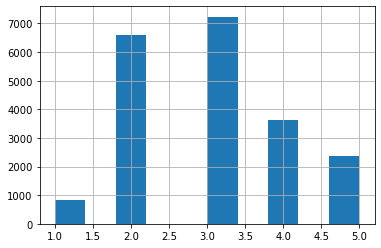

In [59]:
# Stratified Sampling
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1,2,3,4,5])
housing['income_cat'].hist()

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2022)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [61]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [62]:
# income_cat 특성을 삭제해서 데이터를 원상복구
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## 2.4 Visualization and EDA

In [63]:
# Visualization
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

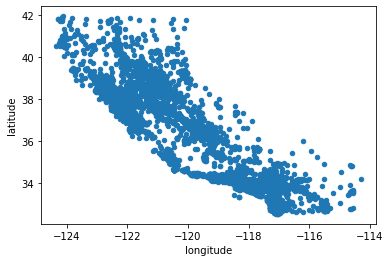

In [64]:
housing.plot(kind='scatter', x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

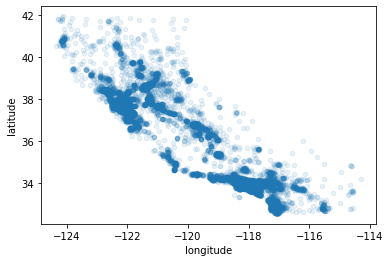

In [65]:
# alpha option
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

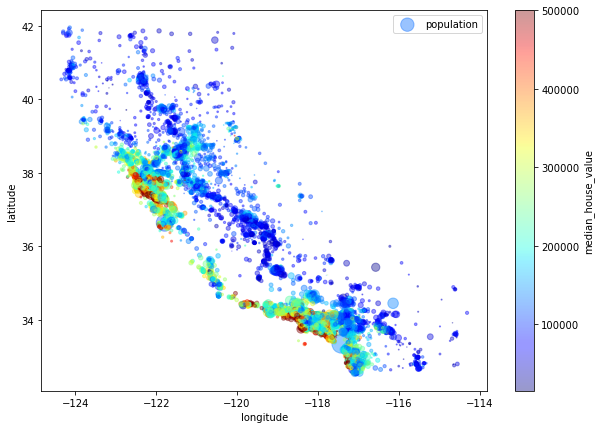

In [66]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [67]:
# Correlation Coefficient
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.682936
total_rooms           0.131666
housing_median_age    0.104471
households            0.063600
total_bedrooms        0.048095
population           -0.028330
longitude            -0.043472
latitude             -0.146788
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

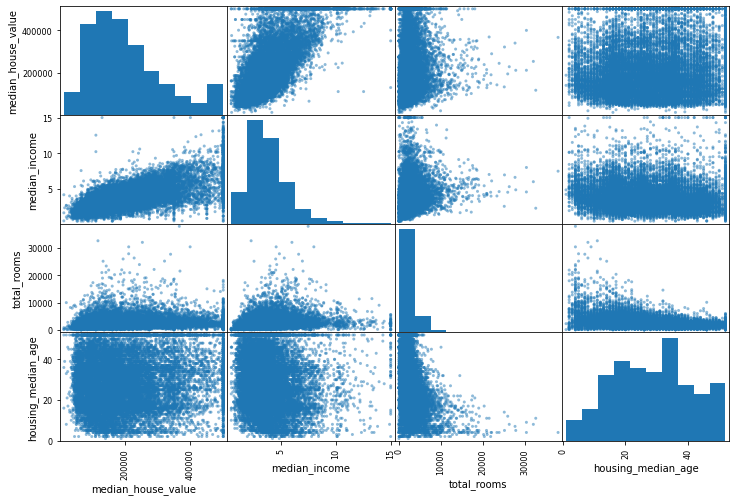

In [68]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

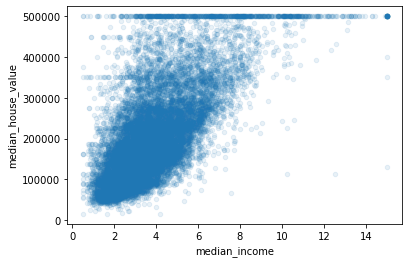

In [69]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [70]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.682936
rooms_per_household         0.157819
total_rooms                 0.131666
housing_median_age          0.104471
households                  0.063600
total_bedrooms              0.048095
population                 -0.028330
population_per_household   -0.034673
longitude                  -0.043472
latitude                   -0.146788
bedrooms_per_room          -0.246927
Name: median_house_value, dtype: float64

## 2.5 Data Setting for Machine Learning Algorithm

In [71]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [72]:
housing.dropna(subset=['total_bedrooms']) # option 1
housing.drop('total_bedrooms', axis=1) # option 2
median = housing['total_bedrooms'].median() # option 3
housing['total_bedrooms'].fillna(median, inplace=True)

In [73]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

housing_num = housing.drop('ocean_proximity', axis=1) # 중간값이 수치형 특성만 계산할 수 있으므로 범주형 제외

imputer.fit(housing_num)

print(imputer.statistics_)
print(housing_num.median().values)

X = imputer.transform(housing_num) # 학습된 객체를 사용해 누락된 값을 대체

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

[-118.48      34.25      29.      2131.       435.      1166.
  409.         3.53875]
[-118.48      34.25      29.      2131.       435.      1166.
  409.         3.53875]


In [74]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10027,-121.04,39.24,48.0,1188.0,227.0,471.0,219.0,2.3125
12592,-121.51,38.52,30.0,3236.0,588.0,1167.0,569.0,4.0972
9452,-123.15,39.74,23.0,608.0,143.0,281.0,108.0,2.9306
16870,-122.41,37.61,43.0,1934.0,303.0,847.0,300.0,4.7381
10682,-117.76,33.53,24.0,2105.0,346.0,712.0,332.0,10.6349
...,...,...,...,...,...,...,...,...
10897,-117.84,33.73,20.0,2572.0,732.0,1534.0,669.0,2.4211
1961,-120.70,38.75,19.0,2325.0,430.0,967.0,376.0,2.9000
15611,-116.89,32.67,9.0,2652.0,393.0,1355.0,362.0,6.2578
662,-122.13,37.70,21.0,4124.0,1054.0,2162.0,998.0,2.6321


In [75]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
10027,INLAND
12592,INLAND
9452,INLAND
16870,NEAR OCEAN
10682,<1H OCEAN
13175,<1H OCEAN
16075,NEAR OCEAN
14968,<1H OCEAN
10737,<1H OCEAN
4519,<1H OCEAN


In [76]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [4.],
       [0.],
       [0.],
       [4.],
       [0.],
       [0.],
       [0.]])

In [77]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [78]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [79]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [80]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_addr', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [83]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
    ])
housing_prepared = full_pipeline.fit_transform(housing)

In [84]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

## 2.6 Model Selection and Training

In [85]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [86]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))
print("레이블:", list(some_labels))

예측: [ 82510.01606252 183784.93901416 128411.74978286 288407.70654832
 488704.59202264]
레이블: [125700.0, 181400.0, 70000.0, 347400.0, 500001.0]


In [87]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68642.3784593494

In [88]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [92]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
# 사이킷런의 교차 검증 기능은 scoring 매개변수에 (낮을수록 좋은) 비용 함수가 아니라 (클수록 좋은) 효용 함수를 기대함
# 그러므로, MSE의 반대값을 계산하는 neg_mean_squared_error 함수를 사용하고, 그로 인해 제곱근을 계산하기 전에 -로 부호를 바꿈 
tree_rmse_scores = np.sqrt(-scores)

In [94]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())
display_scores(tree_rmse_scores)

점수: [75810.68405816 72203.15012052 75989.74516662 72848.18019362
 68702.03729917 68128.60471059 68673.38688977 70408.46159552
 75375.06360844 72111.72982931]
평균: 72025.10434717257
표준편차: 2864.627436028001


In [95]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [71989.12885479 68470.74219012 66028.93773649 74549.00940297
 69177.5480866  67257.19121538 67414.20319897 67851.13045539
 70421.90079041 66193.45821095]
평균: 68935.32501420604
표준편차: 2561.1311975168474


In [97]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
print("훈련 세트에 대한 점수:",np.sqrt(forest_mse))
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("검증 세트에 대한 점수:")
display_scores(forest_rmse_scores)

훈련 세트에 대한 점수: 18683.73909352303
검증 세트에 대한 점수:
점수: [51464.92829862 49969.63961759 50301.1226656  51433.18481036
 49859.29097854 50273.85939027 49661.92670002 48082.03530048
 52252.03485949 48955.99887067]
평균: 50225.402149161906
표준편차: 1176.131304334201


## 2.7 Model Tuning

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30],
    'max_features': [2, 4, 6, 8]},
    {'bootstrap':[False],
    'n_estimators':[3, 10],
    'max_features':[2, 3, 4]}
]
# 먼저 첫 번째 dict에 있는 n_estimator와 max_features의 하이퍼파라미터 조합인 3 * 4 = 12 를 평가하고
# 두 번째 dict인 2 * 3 = 6 개를 시도

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [99]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [100]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [102]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64569.9327027626 {'max_features': 2, 'n_estimators': 3}
55753.97964515909 {'max_features': 2, 'n_estimators': 10}
53146.5805383759 {'max_features': 2, 'n_estimators': 30}
60890.04975537186 {'max_features': 4, 'n_estimators': 3}
52694.93730821276 {'max_features': 4, 'n_estimators': 10}
50696.326323118985 {'max_features': 4, 'n_estimators': 30}
60262.84896624512 {'max_features': 6, 'n_estimators': 3}
52522.30424746872 {'max_features': 6, 'n_estimators': 10}
49925.76780279671 {'max_features': 6, 'n_estimators': 30}
58883.98874323671 {'max_features': 8, 'n_estimators': 3}
52586.794403791755 {'max_features': 8, 'n_estimators': 10}
50313.16409320671 {'max_features': 8, 'n_estimators': 30}
62588.341730111926 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54391.00529966931 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60500.24121631239 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52253.74548122083 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [103]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.07354913, 0.06464487, 0.04216035, 0.01728831, 0.01653789,
       0.016974  , 0.01573128, 0.30793259, 0.07767413, 0.11233362,
       0.06723474, 0.01404739, 0.16202222, 0.00031202, 0.00457343,
       0.00698404])

In [104]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3079325868009947, 'median_income'),
 (0.1620222211434765, 'INLAND'),
 (0.11233361924937915, 'pop_per_hhold'),
 (0.07767412937318102, 'rooms_per_hhold'),
 (0.07354912640657608, 'longitude'),
 (0.06723473668199541, 'bedrooms_per_room'),
 (0.06464486614641379, 'latitude'),
 (0.042160352360457995, 'housing_median_age'),
 (0.017288305637254652, 'total_rooms'),
 (0.01697400256174799, 'population'),
 (0.016537892711629067, 'total_bedrooms'),
 (0.01573128114294204, 'households'),
 (0.01404738509546068, '<1H OCEAN'),
 (0.006984038737281958, 'NEAR OCEAN'),
 (0.004573433158013518, 'NEAR BAY'),
 (0.00031202279319544614, 'ISLAND')]

In [105]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48356.70968026122

In [106]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([46234.65971667, 50389.47293915])